# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [55]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
print(penguins_df.info())
penguins_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB
None


culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE

Cleaning the dataset

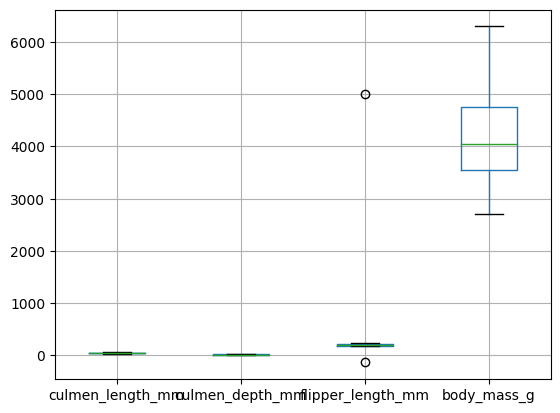

In [56]:
# removing null values and outliers
penguins_df.boxplot()  
plt.show()
penguins_df = penguins_df.dropna()
penguins_df[penguins_df['flipper_length_mm']>4000]
penguins_df[penguins_df['flipper_length_mm']<0]
penguins_clean = penguins_df.drop([9,14])


Preprocessing

In [57]:
# creating dummy variables from sex
penguins_dummies = pd.get_dummies(penguins_clean, drop_first=True)

In [58]:
# scaling the data
scaler = StandardScaler()
penguins_preprocessed = scaler.fit_transform(penguins_dummies)

Principal Component Analysis

In [59]:
# performing PCA
pca = PCA()
pca.fit_transform(penguins_preprocessed)
var_ratio = pca.explained_variance_ratio_
print(var_ratio)

n_components=2

[0.51973484 0.34424041 0.08591863 0.03225427 0.01686049 0.00099136]


In [60]:
# performing PCA on n_components=2
pca_comp = PCA(n_components=n_components)
penguins_PCA = pca_comp.fit_transform(penguins_preprocessed)

Clustering

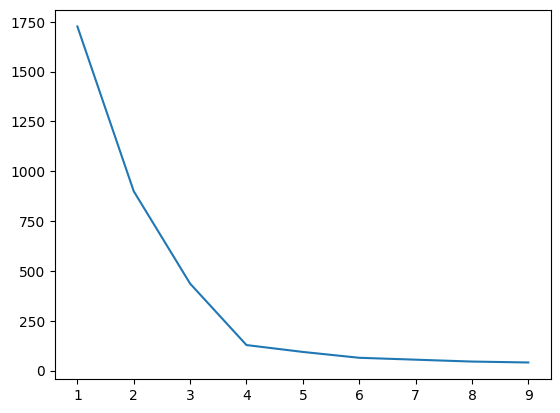

In [61]:
# determining the optimal number of cluster using the elbow method
inertia = []
for i in range(1, 10):
    kmeans_probe = KMeans(n_clusters=i,
                    random_state=42).fit(penguins_PCA)
    inertia.append(kmeans_probe.inertia_)

# visualizing inertia
plt.plot(range(1, 10), inertia)
plt.show()

n_clusters=4

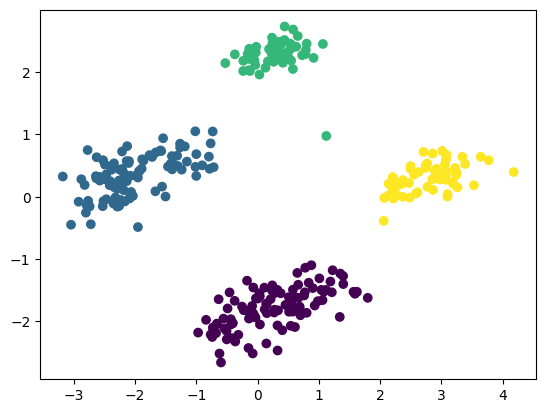

In [62]:
# running k-means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(penguins_PCA)

plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1],
           c=kmeans.labels_)
plt.show()

In [63]:
# adding cluster labels to penguins_clean
penguins_clean["label"] = kmeans.labels_
numeric_columns = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "label"]
stat_penguins = penguins_clean.groupby("label")[numeric_columns].mean()
stat_penguins.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  label
label                                                             
0             43.878302        19.111321         194.764151    0.0
1             40.217757        17.611215         189.046729    1.0
2             45.545763        14.262712         212.779661    2.0
3             49.473770        15.718033         221.540984    3.0